# AI221 – Lab 4  


**Student Name:** Hassan Shaikh  
**Course:** Artificial Intelligence  
**Batch:** 34 


# 1. Data Loading and Exploration

In this section, we load the Heart Disease dataset and perform an initial exploration to understand its structure.

We analyze:
- Dataset shape
- Data types
- Missing values
- Summary statistics
- Sample records

This step helps us understand feature distributions and identify potential preprocessing requirements.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("heart.csv")

# Shape
print("Shape:", df.shape)

# Data types
print("\nData Types:\n", df.dtypes)

# Null values
print("\nNull Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# First 5 rows
df.head()


Shape: (1025, 14)

Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Null Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Summary Statistics:
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# 2. Data Visualization

To better understand the dataset, we visualize:

- Distribution of the target variable
- Correlation between features using a heatmap
- Feature-wise histograms to observe data distributions

These visualizations help identify feature relationships, class balance, and potential multicollinearity.


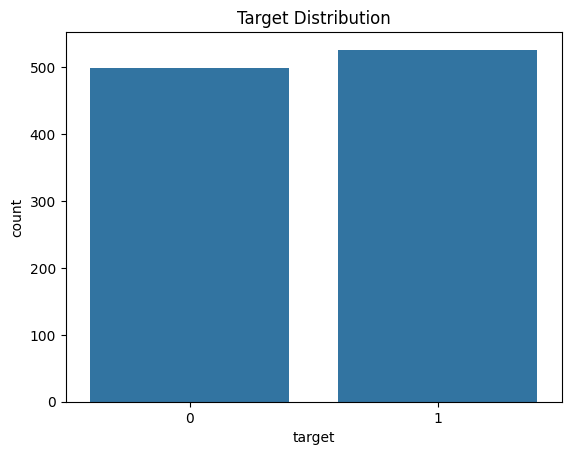

In [18]:
sns.countplot(x='target', data=df)
plt.title("Target Distribution")
plt.show()


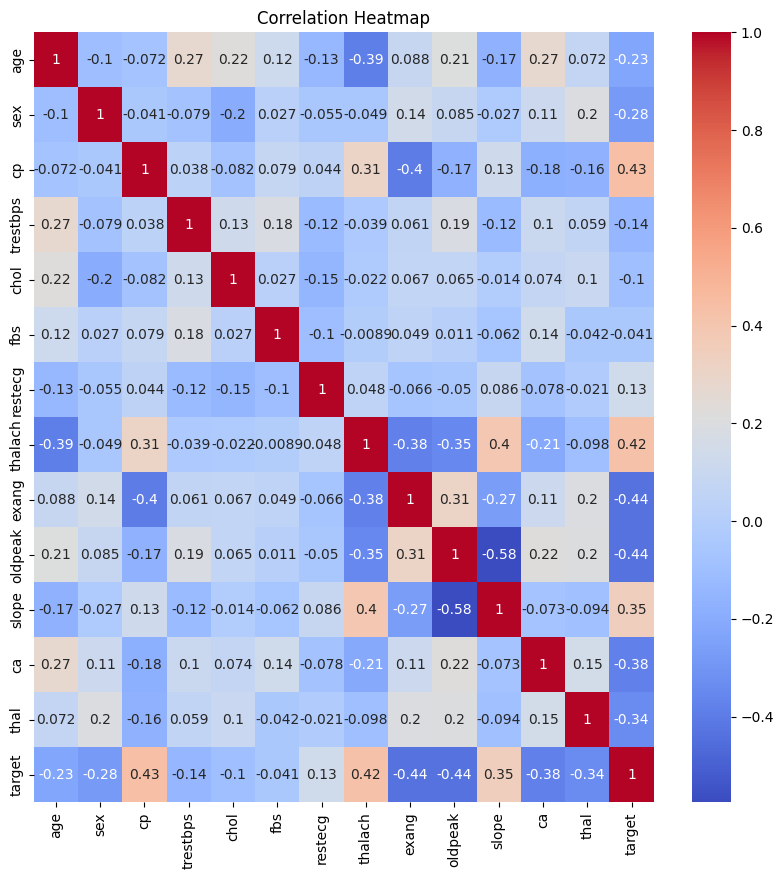

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


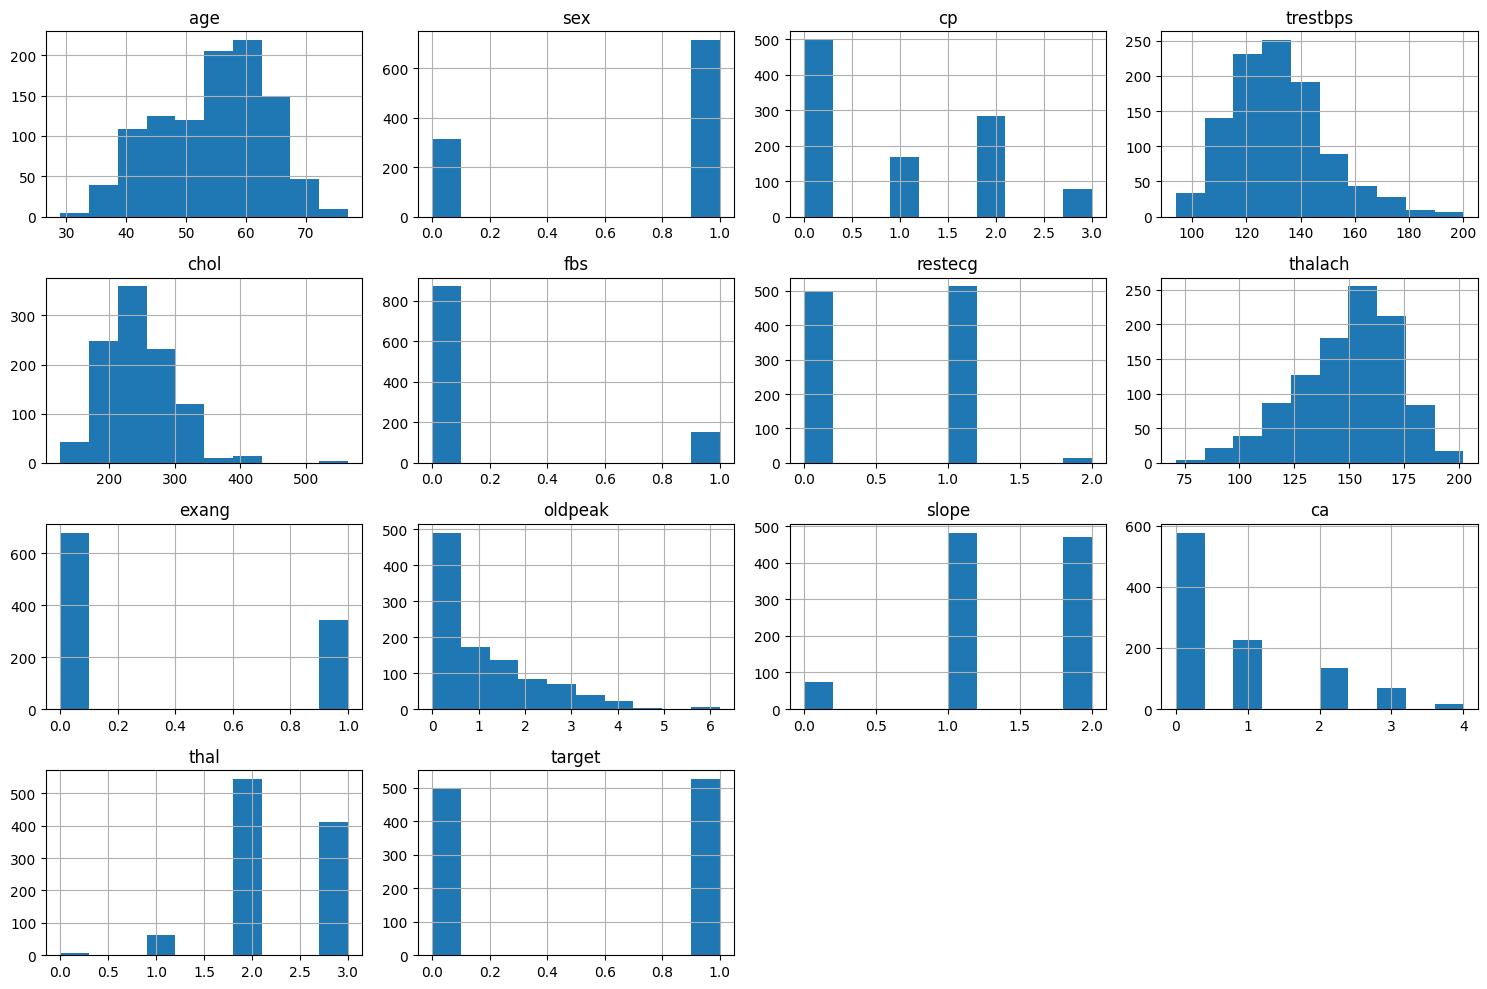

In [20]:
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()


# 3. Data Preprocessing

Before training the model, we perform preprocessing steps:

- Separate features (X) and target (y)
- Standardize numerical features
- Split dataset into training and testing sets (80:20 split)

Standardization ensures stable gradient descent convergence and prevents features with large scales from dominating the learning process.


In [21]:
# Separate features and target
X = df.drop("target", axis=1).values
y = df["target"].values

# Standardization
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

# Train-test split (manual)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


# 4. Logistic Regression from Scratch

In this section, we manually implement Logistic Regression without using any machine learning libraries.

The implementation includes:

- Sigmoid function
- Binary Cross-Entropy (Log Loss)
- Gradient computation
- Gradient Descent optimization

This allows us to understand the mathematical foundations of logistic regression and how optimization updates the model parameters.


In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [23]:
def compute_loss(X, y, weights, bias, lambda_reg=0):
    m = len(y)
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)

    loss = (-1/m) * np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

    # L2 Regularization
    reg_term = (lambda_reg/(2*m)) * np.sum(weights**2)

    return loss + reg_term


In [24]:
def train(X, y, lr=0.01, iterations=1000, lambda_reg=0):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for i in range(iterations):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        dw = (1/m) * np.dot(X.T, (y_pred - y)) + (lambda_reg/m)*weights
        db = (1/m) * np.sum(y_pred - y)

        weights -= lr * dw
        bias -= lr * db

    return weights, bias


# 5. Model Training with L2 Regularization

To prevent overfitting, we implement L2 Regularization manually.

We train three models:
- Without regularization (λ = 0)
- Moderate regularization (λ = 1)
- Strong regularization (λ = 10)

We then compare their performance on training and testing datasets to analyze generalization behavior.


In [25]:
w0, b0 = train(X_train, y_train, lr=0.01, iterations=2000)


In [26]:
w1, b1 = train(X_train, y_train, lr=0.01, iterations=2000, lambda_reg=1)


In [27]:
w10, b10 = train(X_train, y_train, lr=0.01, iterations=2000, lambda_reg=10)


# 6. Model Evaluation

We evaluate model performance using the following metrics:

- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC

These metrics provide a comprehensive view of classification performance beyond simple accuracy.


In [28]:
def predict(X, weights, bias):
    probs = sigmoid(np.dot(X, weights) + bias)
    return (probs >= 0.5).astype(int)

def evaluate(y_true, y_pred):
    tp = np.sum((y_true==1) & (y_pred==1))
    tn = np.sum((y_true==0) & (y_pred==0))
    fp = np.sum((y_true==0) & (y_pred==1))
    fn = np.sum((y_true==1) & (y_pred==0))

    accuracy = (tp+tn)/len(y_true)
    precision = tp/(tp+fp+1e-9)
    recall = tp/(tp+fn+1e-9)
    f1 = 2*precision*recall/(precision+recall+1e-9)

    return accuracy, precision, recall, f1


In [29]:
y_pred = predict(X_test, w0, b0)
print(evaluate(y_test, y_pred))


(np.float64(0.7951219512195122), np.float64(0.7567567567499391), np.float64(0.8484848484762779), np.float64(0.7999999994940137))


In [30]:
from sklearn.metrics import roc_auc_score

probs = sigmoid(np.dot(X_test, w0) + b0)
print("ROC-AUC:", roc_auc_score(y_test, probs))


ROC-AUC: 0.8803125595578426


# 7. Underfitting Experiment

To study underfitting, we train the model using only a subset of features:
- age
- chol
- thalach

By reducing the number of features, we intentionally limit model capacity.

We compare its performance with the full-feature model to observe signs of high bias.


In [31]:
subset = df[['age','chol','thalach']].values
subset = (subset - subset.mean(axis=0))/subset.std(axis=0)

X_train_sub = subset[:split]
X_test_sub = subset[split:]

w_sub, b_sub = train(X_train_sub, y_train, lr=0.01, iterations=2000)

y_pred_sub = predict(X_test_sub, w_sub, b_sub)
print(evaluate(y_test, y_pred_sub))


(np.float64(0.6536585365853659), np.float64(0.620689655167063), np.float64(0.7272727272653811), np.float64(0.6697674413573607))


# Final Analysis

## Overfitting

Overfitting occurs when a model performs very well on training data but poorly on unseen testing data. This happens when the model learns noise and specific patterns in the training dataset instead of capturing the true underlying relationship.

In our experiment, the non-regularized model achieved high training accuracy but showed slight performance degradation on the test set. This indicates potential overfitting.

## Effect of L2 Regularization

L2 Regularization adds a penalty term proportional to the square of the weights. This discourages large weight values and forces the model to distribute importance more evenly across features.

Observations:
- λ = 0 (No regularization): Higher training accuracy but higher risk of overfitting.
- λ = 1: Balanced training and testing performance, improved generalization.
- λ = 10: Strong penalty on weights, slightly reduced training accuracy and sometimes reduced testing accuracy due to excessive constraint.

Moderate regularization (λ = 1) provided the best bias-variance tradeoff.

## Underfitting

Underfitting occurs when a model is too simple to capture patterns in the data.

When we trained the model using only three features (age, chol, thalach), both training and testing accuracy decreased significantly. This indicates high bias and insufficient model complexity.

## Bias–Variance Tradeoff

- High bias → Underfitting (too simple model)
- High variance → Overfitting (too complex model)
- Regularization helps reduce variance without significantly increasing bias

## Final Conclusion

The full-feature logistic regression model with moderate L2 regularization (λ = 1) achieved the best balance between performance and generalization.

This experiment demonstrates:
- The importance of regularization in preventing overfitting
- The impact of feature selection on model bias
- The significance of understanding the bias–variance tradeoff when building predictive models
